<a href="https://colab.research.google.com/github/gyunini/Pytorch_Practice/blob/main/Basic_Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CH2. Basic Model Training

이 장에서는 Pytorch를 이용하여 Deep Learning model을 본격적으로 다루기 전에 간단하게 모델을 구축해보고 학습을 하기위한 데이터셋을 다루는 방법과 Pytorch의 자동미분과 최적화를 배우고 학습한 모델을 저장하고 불러와서 활용하는 것에 대해 살펴보겠습니다.

---

**Contents**
1. [Datasets & DataLoaders](#scrollTo=jmgG75BPvzkZ)
2. [Transforms](#scrollTo=DeXXWhJ9k4l0)
3. [Practice](#scrollTo=_cbgyFyz4lAg)
**Reference**
<div align="left">
    <a href="https://pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html">
        <img src="https://drive.google.com/uc?id=1SwxpnRc2AHWFh4VcRZR6cYjRSRf20I2i" width="15%" alt=""/></a>
    <a href="https://wikidocs.net/book/2788">
        <img src="https://drive.google.com/uc?id=1SOoLx8hKEhRekp1vT_fD5ZJrBm1rP4lK" width="14%" alt=""/></a>
</div>

## 1. Dataset & DataLoaders

https://tutorials.pytorch.kr/beginner/basics/data_tutorial.html# 참고

인공지능 모델을 구축하고 학습시키기 위해서는 먼저 데이터셋을 구성하여 학습할때 불러올 수 있어야 합니다. 데이터 샘플을 처리하는 코드는 지저분(messy)하고 유지보수가 어려울 수 있습니다. 따라서 더 나은 가독성(readability)과 모듈성(modularity)을 위해 데이터셋 코드를 모델 학습 코드로 부터 분리하는 것이 이상적입니다.

Pytorch는 `torch.utils.data.DataLoader`와 `torch.utils.data.Dataset`의 두 가지 데이터 기본 요소를 제공하여 Pytorch에서 제공하는 데이터셋 뿐만아니라 커스텀데이터를 사용할 수 있도록 합니다. `Dataset`은 샘플과 라벨을 저장하고, `DataLoader`는 `Dataset`을 학습에 이용할때 보다 수월하게 활용할 수 있도록 iterable한 객체로 감싸줍니다. 이를 통해 미니 배치 학습, 데이터 셔플(shuffle), 병렬처리까지 간단하게 수행할 수 있습니다. 기본적으로 Dataset을 정의하고 이를 DataLoader에 전달하여 활용합니다.

Pytorch에서는 [`torchvision.datasets`](https://pytorch.org/vision/stable/datasets.html)에서 MNIST, CIFAR 등 과 같이 미리 준비해둔 다양한 데이터셋을 제공하고 있습니다. 이러한 데이터셋은 `torch.utils.data.Dataset`의 하위 클래스로 개별 데이터를 특정하는 함수가 구현되어 있습니다. 이를 통해서 모델을 만들어보고 성능을 측정하는데 사용할 수 있습니다.

**데이터에 관련된 모듈**
- `torch.utils.data`: 데이터셋의 표준을 정의하고 데이터셋을 불러오고 자르고 섞는 데 쓰는 도구들이 들어있는 모듈, 파이토치 모델을 학습시키기 위한 데이터셋의 표준을 torch.utils.data.Dataset에 정의하고 Dataset모듈을 상속하는 파생 클래스는 학습에 필요한 데이터를 로딩해주는 torch.utils.data.DataLoader 인스턴스의 입력으로 사용할 수 있음.
- `torchvision.datasets`: torch.utils.data.Datasets을 상속하는 이미지 데이터셋의 모음
- `torchvision.transfoms`: 이미지 데이터셋에 쓸수 있는 여러가지 변환 필터를 담고 있는 모듈이다. 예를 들어 ***텐서로 변환(ToTensor)한다든지, 크기 조절(resize)과 크롭(crop)으로 이미지를 수정할수 있고, 밝기(brightness), 대비(contrast)등을 조절하는 데 사용될 수도 있음.***
- `torchvision.utils`: 이미지 데이터를 저장하고 시각화하기 위한 도구가 들어있는 모듈

## 1.1 Loading a Dataset
Pytorch에서 제공하는 데이터중에서 [`Fashion-MNIST`](https://github.com/zalandoresearch/)를 이용하여 데이터를 불러오는 예제를 살펴보겠습니다.
`Fashion-MNIST`는 60,000개의 trainset과 10,000개의 testset이 구성되어 있습니다. 이 데이터의 이미지는 28x28 gracyscale로 되어 있으며 총 10개의 클래스로 구성되어있습니다.

Pytorch에서 제공하는 데이터셋을 불러올때 사용하는 매개변수는  데이터셋마다 약간의 차이가 있을수는 있지만 대체적으로 같은 형식으로 구성되어있습니다.
* `root` : train/test 데이터가 저장되는 경로
* `train` : train or test 데이터셋 여부를 지정
* `download=True`: `root`에 지정한 경로에 데이터게 없는 경우 인터넷에서 다운로드를 할 수 있게 함
*`transform, target_transform` : feature와 label의 transform을 지정


In [ ]:
import torch # 파이토치 임포트
from torch.utils.data import Dataset # torch.utils.data.Dataset을 입력으로 받아 torch.util.data.DataLoader에서 shuffle, batch구성, tensor 변환 등을 할 수 있음
from torchvision import datasets # MNIST, CIFAR, ImageNet, FashionMNIST 등의 데이터셋을 가지고 있고 Dataset을 상속받는 모듈
from torchvision.transforms import ToTensor # torchvision.transforms.ToTensor은 PIL 이미지나 numpy array를 텐서로 변환
import matplotlib.pyplot as plt

# datasets.FashionMNIST 데이터를 training data로 로드
# 파라미터에 대한 정보: https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html
# root: FashionMNIST/raw/train-images-idx3-ubyte and FashionMNIST/raw/t10k-images-idx3-ubyte 가 들어갈 데이터 위치 -> 실제 코랩 돌려보면 data라는 폴더가 만들어짐
# train: (bool, optional) – If True, creates dataset from train-images-idx3-ubyte, otherwise from t10k-images-idx3-ubyte.
# download: 다운로드 하거나 아님 이미 있으면 안함
# transform: (callable, optional) – A function/transform that takes in an PIL image and returns a transformed version. E.g, transforms.RandomCrop

train_data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor() # ToTensor로 이미지 데이터를 텐서로 변환함 https://pytorch.org/vision/stable/generated/torchvision.transforms.ToTensor.html 넘파이와 파이토치에서 채널의 위치가 다른 것 주의하자
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:02<00:00, 11738791.25it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 201255.19it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3687926.36it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 3674655.72it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



torch.Size([1, 28, 28])
(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000

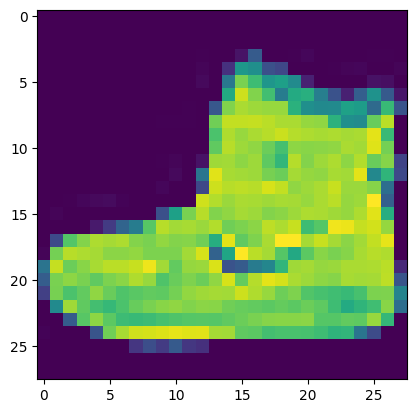

In [ ]:
print(train_data[0][0].shape) # C, W, H 가 (1,28,28) 차원
print(train_data[0])
plt.imshow(train_data[0][0].squeeze()) # 맨 앞의 채널을 날려줘야 이차원 이미지를 보여줄 수 있음
plt.show()

### 1.2 Iterating and Visualizing the Dataset
위에서 불러온 `Dataset`은  리스트(list)처럼 직접 접근 할 수 있으며 데이터가 어떻게 생겼는지 확인해보기위해서 `matplotlib`을 이용해 학습데이터의 일부를 시각화하여 나타내겠습니다.

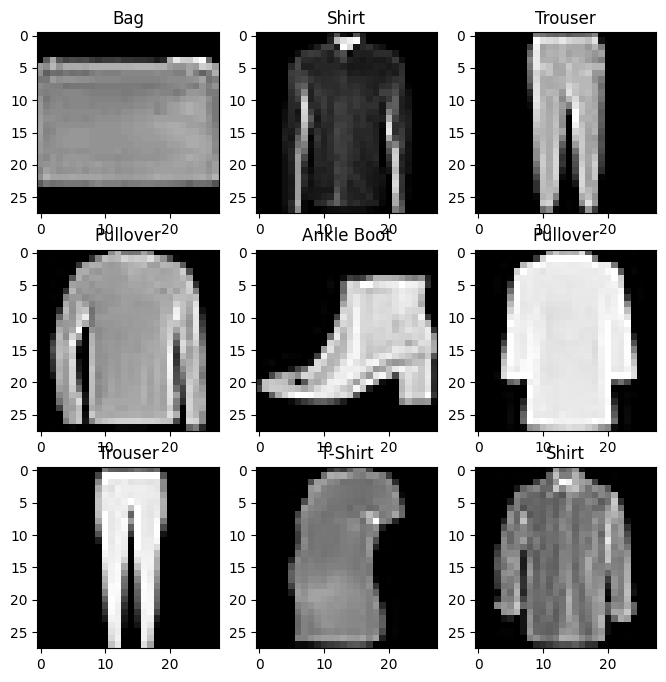

In [ ]:
# label에 대한 정보가 0~9이기 때문에 딕셔너리 형태로 매핑해줌
# https://github.com/zalandoresearch/fashion-mnist 여기서 확인 가능

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8, 8)) # 여러개의 그래프를 그릴 때 plt.figure을 사용해서 figure 생성 https://engineer-mole.tistory.com/218
cols, rows= 3, 3

for i in range(1, cols * rows + 1):
    # randint: tran_data 크기 내의 숫자 내에서 1차원 사이즈 만큼 텐서를 반환 후 item()으로 정수로 변환해줌  https://hoohaha.tistory.com/126
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i) # subplot을 그림: 행, 열, 플롯 번호
    plt.title(labels_map[label]) # 타이틀 생성
    # plt.axis("off")
    plt.imshow(img.squeeze(), cmap='gray') # 차원 수 줄이고, 흑백 이미지로 변환 # imshow: https://pyvisuall.tistory.com/78
plt.show()

## 1.3 Preparing data for training with DataLoaders
`Dataset`은 데이터셋의 특징(feature)을 가져오고 하나의 샘플에 정답(label)을 지정하는 일을 동시에 처리합니다. 모델을 학습할때 일반적으로 샘플들을 미니배치(mini-batch)로 전달하고 매 에폭(epoch)마다 데이터를 다시 섞어서 과적합(overfitting)을 막으며 python의 `multiprocessing`을 사용하여 데이터 검색 속도를 높이려하는데 `DataLoader`는 간단한 API로 이러한 복잡한 과정들을 추상화한 순회 가능한 객체(iterable)입니다.




In [ ]:
from torch.utils.data import DataLoader
# DataLoader는 Dataset을 입력으로 받아 Batch를 생성하고, Batch 생성시 데이터 shuffle, sampling 작업을 한다던지, Tensor로 변환 작업을 할 수 있는 class입니다.
train_dataloader = DataLoader(train_data, batch_size=64, shuffle=True) # torchvision.datasets는 Dataset을 상속받으므로 DataLoader에 입력해줄 수 있음
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=False) # test는 shuffle false로

### 1.3.1 Iterate through the DataLoader
`DataLoader`에 데이터셋을 불러온 뒤에는 필요에 따라서 데이터셋을 순회(iterate)할 수 있는데 위에서 train_dataset을 불러올때 `batch_size=64`로 지정하여 feature와 label을 minibatch 64로 묶어서 반환하게 하고, `shuffle=True`를 통해 모든 배치를 순회한 다음 데이터가 섞이게 됩니다.

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])
tensor([5, 5, 1, 1, 9, 0, 6, 5, 0, 5, 2, 7, 0, 3, 0, 1, 5, 9, 4, 5, 4, 3, 4, 2,
        0, 7, 2, 7, 7, 8, 4, 4, 0, 8, 4, 6, 6, 5, 8, 6, 3, 8, 7, 5, 1, 4, 5, 0,
        2, 7, 9, 9, 5, 1, 4, 7, 9, 5, 1, 7, 6, 8, 2, 6])


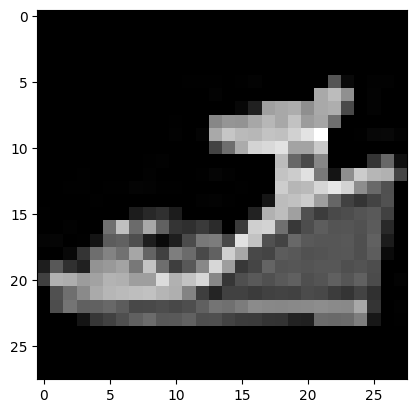

Label: 5


In [ ]:
# 이미지와 정답(label)을 표시합니다.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}") # 앞서 batch size를 64로 했기 때문에 크기가 (64,1,28,28) 인 것을 볼 수 있음
print(f"Labels batch shape: {train_labels.size()}")
print(train_labels)
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

## 1.4 Creating a Custom Dataset
미리 구현되어 있는 데이터셋이 아닌 웹에서 다운을 받거나 직접 데이터셋을 구축하여 활용해야하는 경우가 많이 있습니다. Pytorch에서는 이러한 커스텀 데이터셋에도 마찬가지로 `torch.utils.data.Dataset`과 `torch.utils.data.DataLoader`를 사용할 수 있습니다.

커스텀 데이터셋을 정의하기 위해서 Pytorch에서 제공하는 `torch.utils.data.Dataset`을 상속받아 메소드들을 오버라이딩 하여 커스텀 데이터클래스를 정의합니다. 커스텀 데이터셋을 만들때 반드시 `__init__`, `__len__`, `__getitem__` 3개 함수를 구현해야합니다.

웹에서 데이터를 다운받아서 커스텀 데이터셋을 구성하는 실습은 **[3.2.2장](#scrollTo=nKBaMD7UzUMK)** 에서 다루겠습니다.
``` python
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self): # 객체가 생성될 때 한번만 실행되어 데이터셋의 전처리 관련 처리를 할 수 있음

    def __len__(self):  # 데이터셋의 길이, 총 샘플의 수를 반환

    def __getitem__(self, idx): # 데이터셋에서 idx에 맞는 샘플을 반환
```

**커스텀 데이터셋 예시**

In [ ]:
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

# Dataset 상속
class CustomDataset(Dataset):
  def __init__(self):
    self.x_data = [[73, 80, 75], # (5,3)
                   [93, 88, 93],
                   [89, 91, 90],
                   [96, 98, 100],
                   [73, 66, 70]]
    self.y_data = [[152], [185], [180], [196], [142]] # (5,1)

  # 총 데이터의 개수를 리턴
  def __len__(self):
    return len(self.x_data)

  # 인덱스를 입력받아 그에 맵핑되는 입출력 데이터를 파이토치의 Tensor 형태로 리턴
  def __getitem__(self, idx):
    x = torch.FloatTensor(self.x_data[idx])
    y = torch.FloatTensor(self.y_data[idx])
    return x, y

In [ ]:
dataset = CustomDataset()
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

In [ ]:
dataset.x_data, dataset.y_data

([[73, 80, 75], [93, 88, 93], [89, 91, 90], [96, 98, 100], [73, 66, 70]],
 [[152], [185], [180], [196], [142]])

In [ ]:
data, label = next(iter(dataloader)) # 배치 사이즈가 2이므로 두개씩 나옴
data, label

(tensor([[93., 88., 93.],
         [89., 91., 90.]]),
 tensor([[185.],
         [180.]]))

# 2. Transform
데이터를 구축하여 모델을 학습할때 항상 데이터가 머신러닝 알고리즘 학습에 필요한 최종 처리가된 형태로 제공되지는 않습니다. 따라서 데이터를 변형(Transform)하여 모델에 활용할 수 있도록 적절하게 조작하여 사용합니다.

Pytorch에서 제공하는 모든 `torchvision.dataset`의 데이터셋들은 특징(feature)과 라벨(label)을 변형할 수 있는 `transform`과 `target_transform`을 갖습니다. FashionMNIST의 특징(feature)는 PIL Image 형식이며, 라벨(label)은 정수(interger)의 형식을 갖고 있습니다. 학습을 하기 위해서는 정규화(normalize)된 텐서 형태의 특징(feature)과 원-핫(one-hot)으로 인코딩된 텐서 형태의 라벨(label)이 필요합니다. 이러한 변형을 하기 위해서 `Totensor`와 `Lambda`를 사용하여 변형(transform)을 합니다.

**ToTensor()**
`ToTensor`는 PIL Image나 Numpy `ndarray`를 `FloatTensor`로 변환하고, 이미지의 픽셀의 크기(intensity) 값을 [0., 1.]범위로 비례하여 조정(scale)합니다.

**Lambda 변형(Transfrom)**
Labmda 변형은 사용자 정의 람다(labmda)함수를 적용합니다. 여기에서는 정수를 원-핫 인코딩한 텐서로 바꾸는 함수를 정의하는데 여기서는 먼저 FashionMNIST의 class가 총 10개이니 10짜리 크기의 zero tensor를 만들고 `scatter_`를 호출하여 주어진 라벨에 해당하는 인덱스에 `value=1`로 1을 할당하여 원-핫 인코딩을 수행합니다.

In [ ]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

# https://velog.io/@qw4735/%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98-torch.tensor.scatter
# scatter: 뿌리다는 뜻

# 0차원으로, y자리에 1을 넣기

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

## 2.1 Illustration of Transforms
`torchvision.transform` 모듈은 다양한 이미지 변환을 제공하는데 `Compose`를 사용하여 연결할 수 있습니다. pytorch에서 제공하는 몇가지 transform을 수행해보겠습니다.

In [ ]:
! curl https://user-images.githubusercontent.com/1041752/127776719-f8abfd60-6640-48fb-8b70-a1b6f6ade5cf.jpg > astronaut.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 54117  100 54117    0     0    99k      0 --:--:-- --:--:-- --:--:--   99k


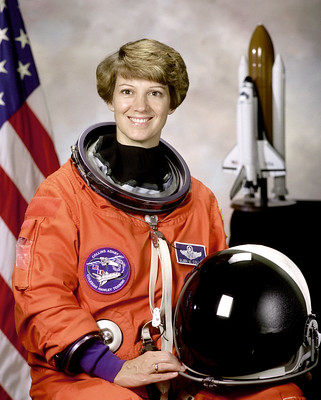

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision.transforms as T

torch.manual_seed(0) # pytorch에서 시드 고정 : https://rabo0313.tistory.com/entry/pytorch-torchmanualseed
plt.rcParams["savefig.bbox"] = 'tight' # "savefig.bbox"를 tight'로 설정하면 plt.savefig()를 사용하여 그림을 저장할 때 Matplotlib가 그림을 단단한 경계 상자로 저장하려고 시도한다는 의미
orig_img = Image.open('./astronaut.jpg') # PIL.image

def plot(imgs, with_orig=True, row_title=None, **imshow_kwargs):
    if not isinstance(imgs[0], list): # imgs[0]가 list형인지 알아봄
        # Make a 2d grid even if there's just 1 row
        imgs = [imgs]

    num_rows = len(imgs)
    num_cols = len(imgs[0]) + with_orig
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False, figsize=(15,20))
    for row_idx, row in enumerate(imgs):
        row = [orig_img] + row if with_orig else row
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            ax.imshow(np.asarray(img), **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    if with_orig:
        axs[0, 0].set(title='Original image') # 맨 처음 이미지 타이틀 지정
        axs[0, 0].title.set_size(8)
    if row_title is not None: # row_title이 있으면 (list형태로 주어짐)
        for row_idx in range(num_rows):
            axs[row_idx, 0].set(ylabel=row_title[row_idx]) # 각 title 표시해줌

    plt.tight_layout()

orig_img

**Pad**

`pad`는 이미지 테두리를 일부 픽셀 값으로 채워줍니다.

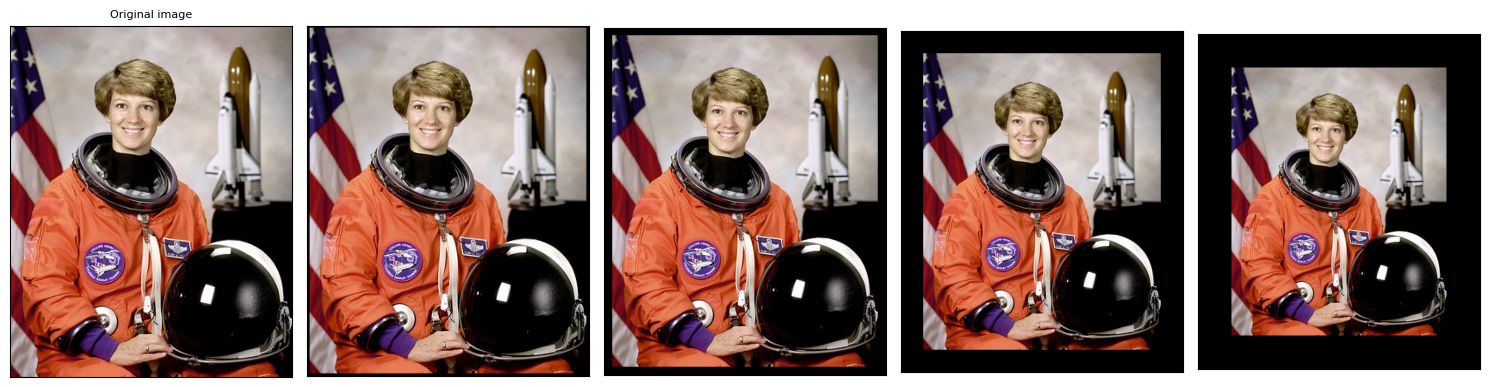

In [ ]:
padded_imgs = [T.Pad(padding=padding)(orig_img) for padding in (3, 10, 30, 50)]
plot(padded_imgs)

**Resize**

`Resize`는 이미지의 크기를 조정합니다.

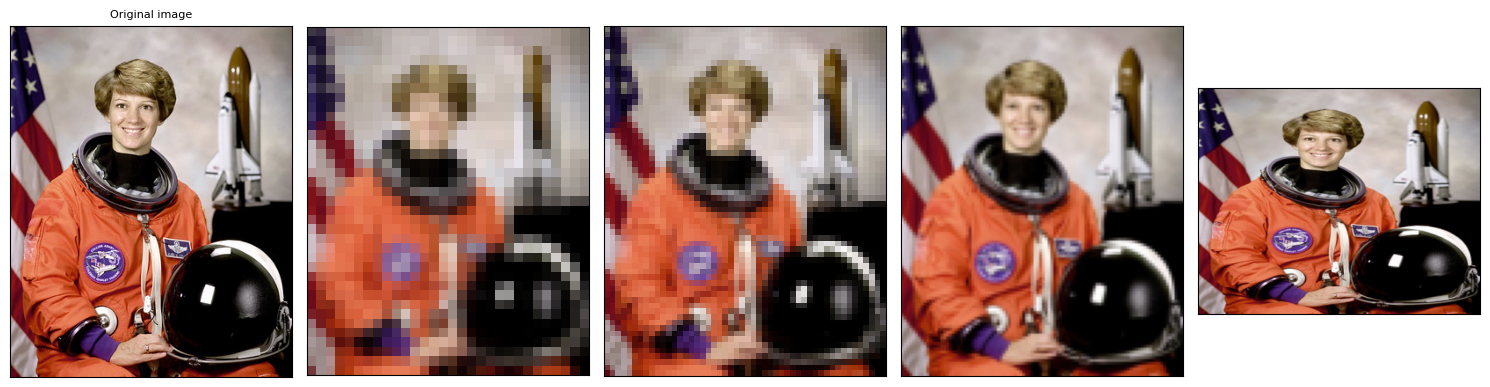

In [ ]:
resized_imgs = [T.Resize(size=size)(orig_img) for size in (30, 50, 100, orig_img.size)]
plot(resized_imgs)

**RandomCrop**

`RandomCrop`은 이미지의 랜덤한 영역을 잘라서 나타냅니다.


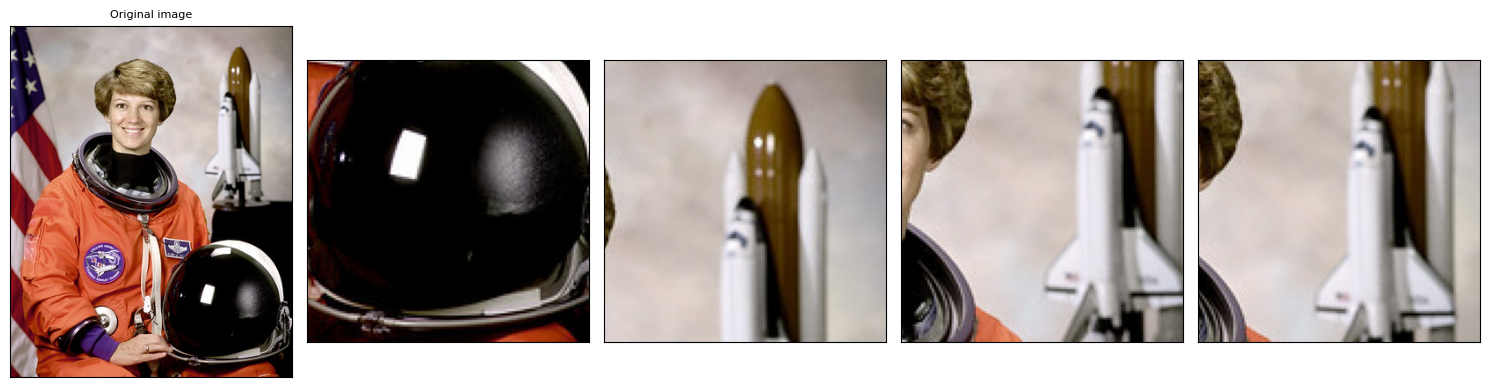

In [ ]:
cropper = T.RandomCrop(size=(128, 128))
crops = [cropper(orig_img) for _ in range(4)]
plot(crops)

**RandomRotation**

RandomRotation은 이미지의 각도(angle)을 랜덤으로 설정해서 회전해줍니다.

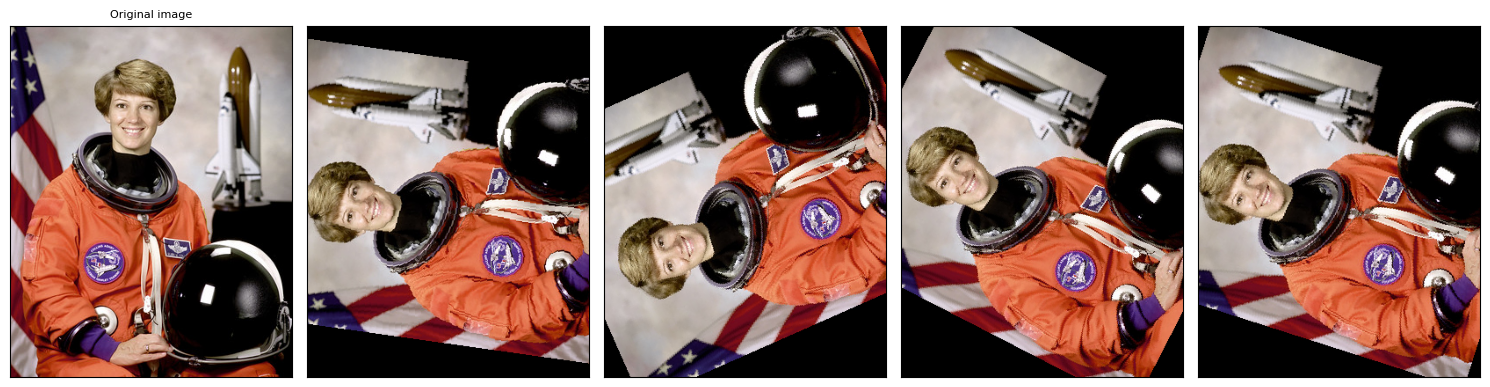

In [ ]:
rotater = T.RandomRotation(degrees=(0, 180))
rotated_imgs = [rotater(orig_img) for _ in range(4)]
plot(rotated_imgs)

**RandomHorizontalFlip & RandomVerticalFlip**

`RandomHorizontalFlip` 과 `RandomVerticalFlip`은 확률값 `p`를 지정하여 주어진 확률로 이미지의 수평 & 수직 뒤집기를 수행합니다.

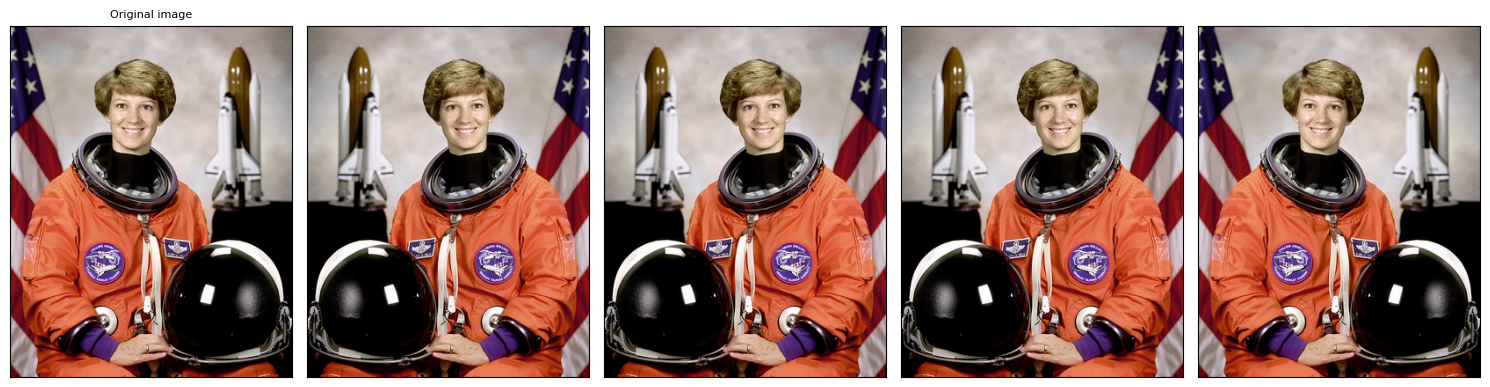

In [ ]:
hflipper = T.RandomHorizontalFlip(p=0.5)
transformed_imgs = [hflipper(orig_img) for _ in range(4)]
plot(transformed_imgs)

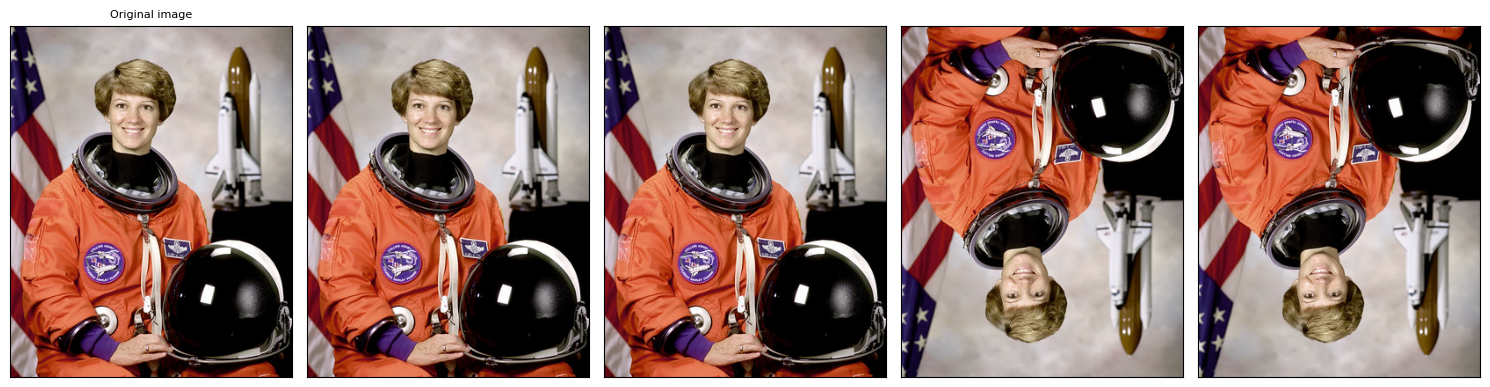

In [ ]:
vflipper = T.RandomVerticalFlip(p=0.5)
transformed_imgs = [vflipper(orig_img) for _ in range(4)]
plot(transformed_imgs)

**AutoAugment**

`AutoAugment`는 [AutoAugment : Learning Augmentation Strategies from Data](https://arxiv.org/pdf/1805.09501.pdf)에 기반한 AutoAugment 데이터 증강방법으로 지정된 `AutoAugmentPolicy`에 따라 데이터를 자동으로 변형합니다.


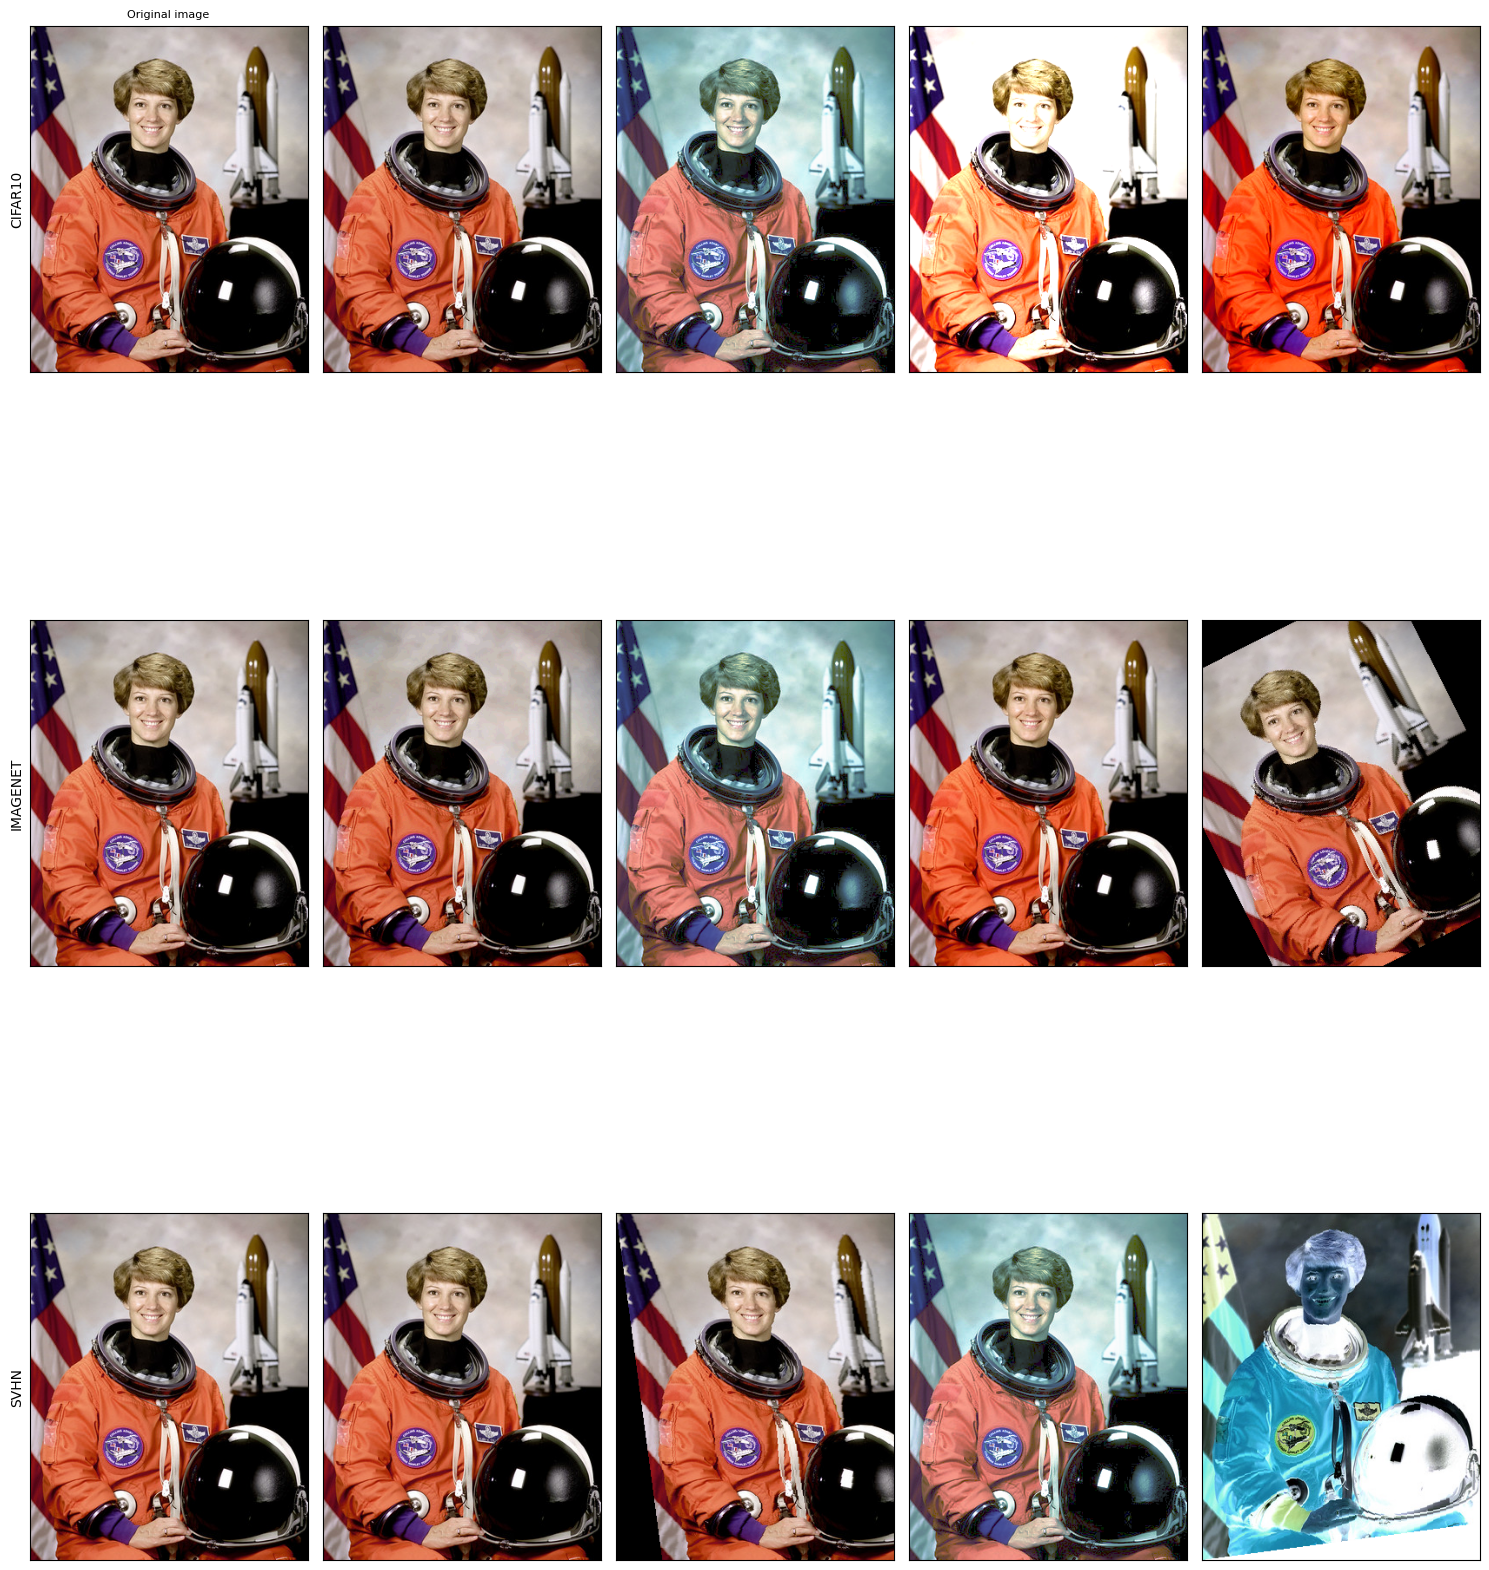

In [ ]:
policies = [T.AutoAugmentPolicy.CIFAR10, T.AutoAugmentPolicy.IMAGENET, T.AutoAugmentPolicy.SVHN]
augmenters = [T.AutoAugment(policy) for policy in policies]
imgs = [
    [augmenter(orig_img) for _ in range(4)] # policy마다 4개의 이미지를 만듬
    for augmenter in augmenters
]
row_title = [str(policy).split('.')[-1] for policy in policies] # [T.AutoAugmentPolicy.CIFAR10, T.AutoAugmentPolicy.IMAGENET, T.AutoAugmentPolicy.SVHN] 여기서 . 뒤에만 자름
plot(imgs, row_title=row_title)

## 3.Pratice
**[Writing Custom Datasets, Dataloader and Transforms](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html)**


위에서 배운 Dataset, DataLoader, transform을 이용해서 실제로 Custom Dataset을 구성하는 과정을 실습해보겠습니다.

실습에서 다룰 데이터셋은 얼굴 포즈에 관한 데이터셋을 다루겠습니다.

### 3.1 setup
먼저 실습에서 필요한 모든 라이브러리를 불러옵니다.
* `scikit-image`: For image io and transforms
* `pandas`: For easier csv parsing

In [ ]:
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

### 3.2 Dataset
실습에서 다룰 데이터셋은 얼굴 포즈 데이터셋으로 전체적으로 68개의 서로 다른 랜드마크 포인트가 각 얼굴에 대해 주석으로 표시 됩니다. 먼저 데이터셋을 다운받은 다음 데이터에 대해 확인해보겠습니다.

In [ ]:
!wget https://download.pytorch.org/tutorial/faces.zip
!unzip faces.zip

--2023-09-08 04:30:18--  https://download.pytorch.org/tutorial/faces.zip
Resolving download.pytorch.org (download.pytorch.org)... 18.164.154.123, 18.164.154.17, 18.164.154.30, ...
Connecting to download.pytorch.org (download.pytorch.org)|18.164.154.123|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5780252 (5.5M) [application/zip]
Saving to: ‘faces.zip’

faces.zip           100%[===================>]   5.51M  --.-KB/s    in 0.05s   

2023-09-08 04:30:19 (101 MB/s) - ‘faces.zip’ saved [5780252/5780252]

Archive:  faces.zip
   creating: faces/
  inflating: faces/0805personali01.jpg  
  inflating: faces/1084239450_e76e00b7e7.jpg  
  inflating: faces/10comm-decarlo.jpg  
  inflating: faces/110276240_bec305da91.jpg  
  inflating: faces/1198_0_861.jpg    
  inflating: faces/137341995_e7c48e9a75.jpg  
  inflating: faces/1383023626_8a49e4879a.jpg  
  inflating: faces/144044282_87cf3ff76e.jpg  
  inflating: faces/152601997_ec6429a43c.jpg  
  inflating: faces/154904038

#### 3.2.1 Visualize Dataset & Confirm annotation file
데이터셋은 주석의 정보가 담겨있는 csv파일을 같이 제공하는데 `face_landmarks.csv` 파일에서 주석에 대한 정보를 확인할 수 있습니다. 먼저 csv에서 단일 이미지 이름과 해당하는 주석을 가져와서 확인해보겠습니다. 여기선 person-7.jpg 이미지에 대한 행 인덱스 번호 65를 예를 들어 살펴보고 이미지 이름을 `img_name`으로 저장하고 주석을 (Landmarks의 개수, 2) 배열 형식으로 저장합니다.

In [ ]:
landmarks_frame = pd.read_csv('faces/face_landmarks.csv')

n = 65
img_name = landmarks_frame.iloc[n, 0] # https://bigdaheta.tistory.com/42 65번째 행, 0번째 열
landmarks = landmarks_frame.iloc[n, 1:]
landmarks = np.asarray(landmarks) # asarray: https://supermemi.tistory.com/entry/numpy-%EB%B0%B0%EC%97%B4-%EC%83%9D%EC%84%B1-%EB%B0%A9%EB%B2%95-nparray-npasarray-npasfarray-npasarraychkfinite-npzeroslike-nponeslike-npemptylike
landmarks = landmarks.astype('float').reshape(-1, 2) # x, y 좌표가 68개의 점으로 나타내어지기 때문에 shape 변형, astype으로 타입 변형

print('Image name: {}'.format(img_name))
print('Landmarks shape: {}'.format(landmarks.shape))
print('First 4 Landmarks: {}'.format(landmarks[:4])) # 4개만 찍어보면 x, y좌표가 나옴

Image name: person-7.jpg
Landmarks shape: (68, 2)
First 4 Landmarks: [[32. 65.]
 [33. 76.]
 [34. 86.]
 [34. 97.]]


In [ ]:
# landmarks_frame.csv 파일의 내용을 pandas로 살펴보기
landmarks_frame

image_name  part_0_x  part_0_y  part_1_x  part_1_y  \
0                 0805personali01.jpg        27        83        27        98   
1           1084239450_e76e00b7e7.jpg        70       236        71       257   
2                  10comm-decarlo.jpg        66       114        65       128   
3            110276240_bec305da91.jpg        42       140        45       161   
4                      1198_0_861.jpg       138       392       141       427   
..                                ...       ...       ...       ...       ...   
64                    matt-mathes.jpg        85       152        83       173   
65                       person-7.jpg        32        65        33        76   
66                         person.jpg        78        83        79        93   
67  person_TjahjonoDGondhowiardjo.jpg        41        92        41       103   
68                    personalpic.jpg        40       109        40       122   

    part_2_x  part_2_y  part_3_x  part_3_y  part_4_x  ...  part_63_x  \
0         29       113        33       127        39  ...         93   
1         75       278        82       299        90  ...        148   
2         67       142        68       156        72  ...        128   
3         51       180        61       200        73  ...        144   
4        145       464       152       501       166  ...        293   
..       ...       ...       ...       ...       ...  ...        ...   
64        83       195        85       217        91  ...        160   
65        34        86        34        97        37  ...         79   
66        80       103        81       112        85  ...        119   
67        43       114        44       125        48  ...         85   
68        41       135        42       148        44  ...         80   

    part_63_y  part_64_x  part_64_y  part_65_x  part_65_y  part_66_x  \
0         136        100        141         93        135         89   
1         311        179        308        149        312        137   
2         162        136        167        127        166        121   
3         197        180        189        147        204        136   
4         507        331        511        294        516        279   
..        ...        ...        ...        ...        ...        ...   
64        224        190        225        162        236        151   
65         98         91         99         79         99         74   
66        115        132        114        120        121        114   
67        130         94        130         85        128         81   
68        165         94        165         80        165         74   

    part_66_y  part_67_x  part_67_y  
0         135         84        134  
1         314        128        312  
2         165        116        164  
3         208        125        209  
4         518        265        516  
..        ...        ...        ...  
64        237        141        235  
65         99         69         99  
66        122        109        121  
67        128         77        128  
68        165         68        164  

[69 rows x 137 columns]

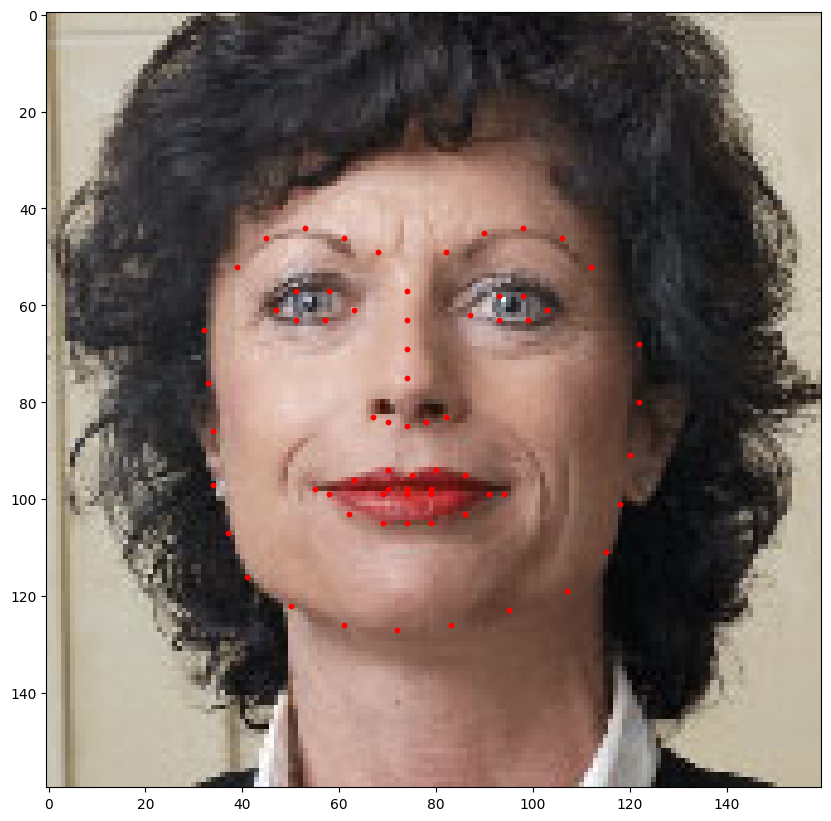

In [ ]:
def show_landmarks(image, landmarks):
    """Show image with landmarks"""
    plt.imshow(image)
    plt.scatter(landmarks[:, 0], landmarks[:, 1], s=40, marker='.', c='r') # x, y, s=size, c=color
    plt.pause(0.001)  # pause a bit so that plots are updated

plt.figure(figsize=(10,15)) # figsize 단위는 인치
show_landmarks(io.imread(os.path.join('./faces/', img_name)), # person-7
               landmarks)
plt.show()

#### 3.2.2 Dataset class
**[1.4장](#scrollTo=cG-wTy-k1DIQ)** 에서 커스텀 데이터셋에 대해서 간략하게 텐서를 생성해서 다루어 봤는데 이번에는 웹에서 다운 받은 얼굴 포즈 데이터셋으로 커스텀 데이터셋 클래스를 구성해보겠습니다.


In [ ]:
class FaceLandmarksDataset(Dataset): # 커스텀 데이터셋 구성을 위해 Dataset 상속 후 __init__, __len__, __getitem__ 오버라이딩
    """Face Landmarks dataset."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.landmarks_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.landmarks_frame)

    def __getitem__(self, idx):
        if torch.is_tensor(idx): # torch.is_tensor()
            idx = idx.tolist()  # toroch.tolist(), https://technical-support.tistory.com/48 리스트로 변환

        img_name = os.path.join(self.root_dir,
                                self.landmarks_frame.iloc[idx, 0]) # 0번째 열이 image name
        image = io.imread(img_name) # 이미지 읽고
        landmarks = self.landmarks_frame.iloc[idx, 1:] # 나머지 열들 슬라이싱
        # print(landmarks) # part_0_x      27 part_0_y      83 -> dataframe 형태
        landmarks = np.array([landmarks]) # np array로 변환
        # print(landmarks) # 이차원 어레이
        landmarks = landmarks.astype('float').reshape(-1, 2)
        sample = {'image': image, 'landmarks': landmarks}

        if self.transform: # transform 있으면 적용
            sample = self.transform(sample)

        return sample

생성된 커스텀 데이터셋 클래스가 제대로 작동하는지 확인하기 위해서 커스텀 데이터셋 클래스를 인스턴스화 하고 데이터샘플을 반복해서 살펴보겠습니다. 처음 4개의 샘플이미지와 랜드마크를 시각화해서 제대로 데이터가 나오는지 확인해보겠습니다.

69
0 (324, 215, 3) (68, 2)


<Figure size 640x480 with 0 Axes>

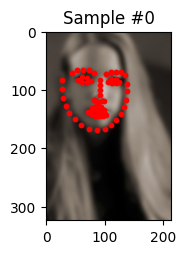

1 (500, 333, 3) (68, 2)


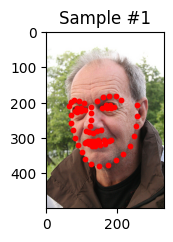

2 (250, 258, 3) (68, 2)


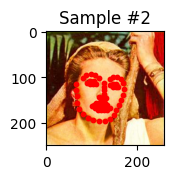

3 (434, 290, 3) (68, 2)


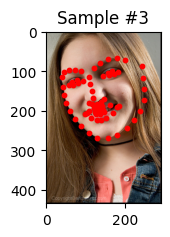

In [ ]:
face_dataset = FaceLandmarksDataset(csv_file='./faces/face_landmarks.csv',
                                    root_dir='./faces/')

fig = plt.figure()

print(len(face_dataset)) # 69

for i in range(len(face_dataset)):
    sample = face_dataset[i]

    print(i, sample['image'].shape, sample['landmarks'].shape)

    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    # ax.axis('off')
    show_landmarks(**sample) # **은 parameter

    if i == 3: # subplot을 4개만 그리게 했으므로 3에서 break
        plt.show()
        break

### 3.3 Transform
위에서 커스텀 데이터셋 클래스를 정의하고 시각화하여 살펴봤을때 한가지 문제를 찾아볼 수 있는데 각 샘플마다 샘플 이미지의 크기가 다른 것을 확인할 수 있습니다. 대부분 신경망은 고정된 크기의 이미지를 이용해서 모델을 학습하게되는데 이러한 과정을 위해서 몇가지 변형을 통해서 전처리를 수행합니다. 'torchvision.transform`에서 제공하는 transform을 바로 적용해도 되지만 여기서는 transform 전처리 코드를 직접 작성해서 수행해보겠습니다.
* `Rescale`: 이미지 크기조정
* `RandomCrop`: 이미지에서 무작위로 자르기(data augmentation)
* `ToTensor`: numpy 이미지를 torch 이미지로 변환(축변경)

In [ ]:
class Rescale(object):
    """Rescale the image in a sample to a given size.

    Args:
        output_size (tuple or int): Desired output size. If tuple, output is
            matched to output_size. **** If int, smaller of image edges is matched *****
            to output_size keeping aspect ratio the same.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple)) # assert는 뒤의 조건이 True가 아니면 AssertError를 발생한다. int, tuple 둘 중 하나
        self.output_size = output_size

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']

        h, w = image.shape[:2] # 마지막 c는 버림
        if isinstance(self.output_size, int): # output_size가 int일경우
            if h > w:
                new_h, new_w = self.output_size * h / w, self.output_size # h / w 의 비율을 곱해줌
            else:
                new_h, new_w = self.output_size, self.output_size * w / h
        else:
            new_h, new_w = self.output_size # output_size가 튜플일경우

        new_h, new_w = int(new_h), int(new_w)

        img = transform.resize(image, (new_h, new_w)) # transform.resize 이용 https://pytorch.org/vision/stable/generated/torchvision.transforms.Resize.html

        # h and w are swapped for landmarks because for images,
        # x and y axes are axis 1 and 0 respectively
        landmarks = landmarks * [new_w / w, new_h / h]

        return {'image': img, 'landmarks': landmarks}


class RandomCrop(object):
    """Crop randomly the image in a sample.

    Args:
        output_size (tuple or int): Desired output size. If int, square crop
            is made.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        if isinstance(output_size, int):
            self.output_size = (output_size, output_size) # random crop이므로 정사각형 형태로 output_size를 crop하기 위해서 튜플로 저장
        else: # 튜플이면
            assert len(output_size) == 2
            self.output_size = output_size

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']

        h, w = image.shape[:2]
        new_h, new_w = self.output_size

        top = np.random.randint(0, h - new_h)
        left = np.random.randint(0, w - new_w)

        image = image[top: top + new_h,
                      left: left + new_w]

        landmarks = landmarks - [left, top]

        return {'image': image, 'landmarks': landmarks}


class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']

        # swap color axis because
        # numpy image: H x W x C
        # torch image: C X H X W
        image = image.transpose((2, 0, 1)) # np.transpose 이용***
        return {'image': torch.from_numpy(image), # torch.from_numpy : 넘파이를 텐서로 변환
                'landmarks': torch.from_numpy(landmarks)}

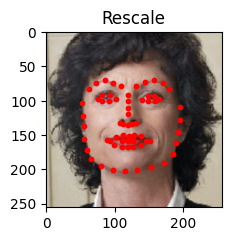

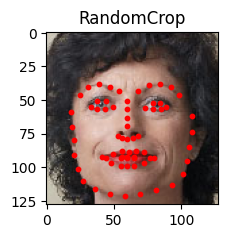

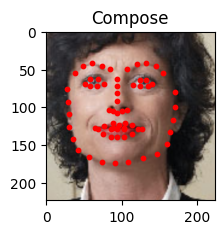

In [ ]:
scale = Rescale(256)
crop = RandomCrop(128)
composed = transforms.Compose([Rescale(256), # Compose를 통해 여러 단계를 하나로 합침 https://wikidocs.net/157285
                               RandomCrop(224)])

# Apply each of the above transforms on sample.
fig = plt.figure()
sample = face_dataset[65] # 65번째 샘플
for i, tsfrm in enumerate([scale, crop, composed]):
    transformed_sample = tsfrm(sample)

    ax = plt.subplot(1, 3, i + 1)
    plt.tight_layout()
    ax.set_title(type(tsfrm).__name__)
    show_landmarks(**transformed_sample)

plt.show()

### 3.4 DataLoader

이제 위에서 작성한 커스텀 데이터셋과 Transform을 적용하여 dataloader로 데이터 일괄처리, 데이터 섞기, `multiprocessing`를 통한 데이터 병렬로드와 같은 기능을 사용할 수 있도록 만들수 있습니다.

0 torch.Size([4, 3, 224, 224]) torch.Size([4, 68, 2])
1 torch.Size([4, 3, 224, 224]) torch.Size([4, 68, 2])
2 torch.Size([4, 3, 224, 224]) torch.Size([4, 68, 2])
3 torch.Size([4, 3, 224, 224]) torch.Size([4, 68, 2])


<Figure size 640x480 with 0 Axes>

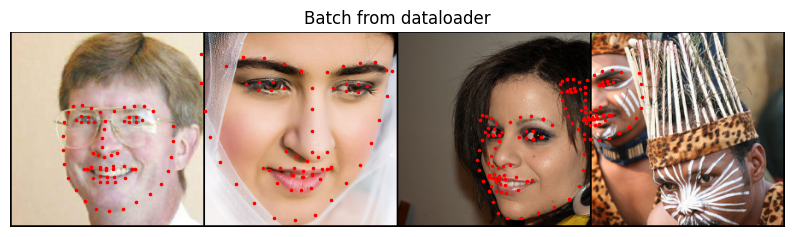

In [ ]:
transformed_dataset = FaceLandmarksDataset(csv_file='./faces/face_landmarks.csv',
                                           root_dir='./faces/',
                                           transform=transforms.Compose([ # 위의 코드와는 다르게 transform이 파라미터로 들어감
                                               Rescale(256),
                                               RandomCrop(224),
                                               ToTensor()
                                           ]))

dataloader = DataLoader(transformed_dataset, batch_size=4,
                        shuffle=True, num_workers=2) # num_workers로 멀티프로세싱 데이터 병렬로드


# Helper function to show a batch
def show_landmarks_batch(sample_batched):
    """Show image with landmarks for a batch of samples."""
    images_batch, landmarks_batch = \
            sample_batched['image'], sample_batched['landmarks']
    batch_size = len(images_batch)
    im_size = images_batch.size(2)

    grid = utils.make_grid(images_batch)
    plt.figure(figsize=(10,15))
    plt.imshow(grid.numpy().transpose((1, 2, 0)))

    for i in range(batch_size):
        plt.scatter(landmarks_batch[i, :, 0].numpy() + i * im_size,
                    landmarks_batch[i, :, 1].numpy(),
                    s=10, marker='.', c='r')

        plt.title('Batch from dataloader')

for i_batch, sample_batched in enumerate(dataloader):
    print(i_batch, sample_batched['image'].size(),
          sample_batched['landmarks'].size())

    # observe 4th batch and stop.
    if i_batch == 3:
        plt.figure()
        show_landmarks_batch(sample_batched)
        plt.axis('off')
        plt.ioff()
        plt.show()
        break